In [1]:
import netCDF4
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import cmocean as cm
import matplotlib.colors as mcolors
from xgcm import Grid
%matplotlib inline
from mpl_toolkits import mplot3d
import gsw
import pandas as pd
import colormaps as cmaps

In [2]:
# !pip3 install colormaps

In [2]:
direc = "/data/gpfs/projects/punim1661/hori_conv/v4/"
case = ""

In [3]:
ds_dyn = xr.open_dataset(direc + case + "slices_v06.nc", decode_times=False)

In [4]:
ds_dyn #= ds_dyn.load()#.time / (60*60)

<xarray.Dataset>
Dimensions:  (time: 480, y_afa: 513, x_faa: 513, x_caa: 512, y_aca: 512,
              z_aaf: 129, z_aac: 128)
Coordinates:
  * time     (time) float64 1.11e+04 1.11e+04 1.11e+04 ... 1.127e+04 1.127e+04
  * y_afa    (y_afa) float32 0.0 0.001953 0.003906 0.005859 ... 0.9961 0.998 1.0
  * x_faa    (x_faa) float32 0.0 0.001953 0.003906 0.005859 ... 0.9961 0.998 1.0
  * x_caa    (x_caa) float32 0.0009766 0.00293 0.004883 ... 0.9951 0.9971 0.999
  * y_aca    (y_aca) float32 0.0009766 0.00293 0.004883 ... 0.9951 0.9971 0.999
  * z_aaf    (z_aaf) float32 -0.1 -0.09922 -0.09844 ... -0.001563 -0.0007813 0.0
  * z_aac    (z_aac) float32 -0.09961 -0.09883 -0.09805 ... -0.001172 -0.0003906
Data variables:
    Δx_caa   (x_caa) float32 ...
    Δx_faa   (x_faa) float32 ...
    Δy_aca   (y_aca) float32 ...
    Δy_afa   (y_afa) float32 ...
    Δz_aac   (z_aac) float32 ...
    Δz_aaf   (z_aaf) float32 ...
    T_x0     (time, z_aac, y_aca) float32 ...
    u_top    (time, y_aca, x_faa) float32 ...
    v_top    (time, y_afa, x_caa) float32 ...
    w_top    (time, y_aca, x_caa) float32 ...
    w_y1     (time, z_aaf, x_caa) float32 ...
Attributes:
    Julia:                      This file was generated using CUDA GPU: NVIDI...
    Oceananigans:               This file was generated using Oceananigans v0...
    date:                       This file was generated on 2025-11-18T21:39:3...
    interval:                   5
    output iteration interval:  Output was saved every 5 iteration(s).
    schedule:                   IterationInterval

In [6]:
# da_dyn.T.isel(z_aac=-15, time=[-1]).mean('time').plot(robust=True, cmap=cm.cm.thermal)
ds_dyn.T_top.isel(time=-1).plot(robust=True, cmap=cm.cm.thermal)

AttributeError: 'Dataset' object has no attribute 'T_top'

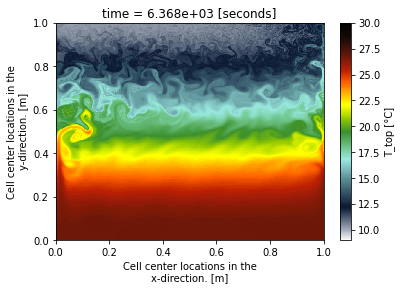

In [7]:
# da_dyn.T.isel(z_aac=-4, time=-1).plot(robust=True, cmap=cm.cm.thermal)
ds_dyn.T_top.isel(time=-1).plot(vmin=9, vmax=30, cmap=cmaps.nice_gfdl)

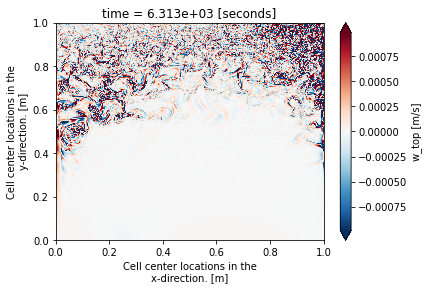

In [7]:
# da_dyn.w.isel(z_aaf=-27, time=-1).plot(robust=True)
ds_dyn.w_top.isel(time=-1).plot(robust=True)

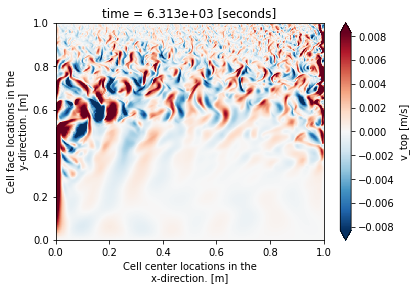

In [8]:
ds_dyn.v_top.isel(time=-1).plot(robust=True)

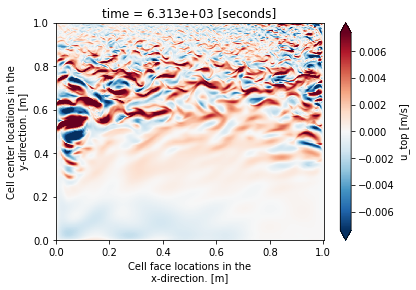

In [9]:
ds_dyn.u_top.isel(time=-1).plot(robust=True)

In [6]:
Pr = 5
Ra = 1e12
Ro = 0.02

In [7]:
Lx, Ly = 1, 1
H = 0.1
ΔT = 20.0
ν = 1e-6
κ = ν / Pr
α = 2e-4

In [8]:
g_alf = Ra * ν * κ / (ΔT * Ly**2)
g = g_alf / α
print('g = ', g)

g =  49.99999999999999


In [9]:
U = (g * α * ΔT * H)**(1/2)
f0 = U / (Ro * 1)
print('f0 = ', f0)

f0 =  7.071067811865475


In [10]:
T_w = (ds_dyn.T_x0 - 10) / 20

In [11]:
w_n = ds_dyn.w_y1 / (g * α * ΔT / f0)

In [12]:
EKE = 0.5*(
ds_dyn.u_top.interp(x_faa=ds_dyn.x_caa)**2 +
ds_dyn.v_top.interp(y_afa=ds_dyn.y_aca)**2 +
ds_dyn.w_top**2
) / (g * α * ΔT / f0)**2

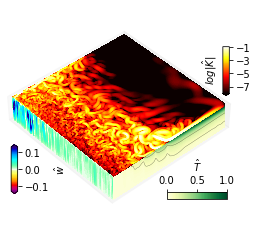

In [28]:
# from mpl_toolkits.mplot3d import axes3d

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d', computed_zorder=False)

# K_=ax.contourf(EKE.y_aca, EKE.x_caa, np.log(EKE.isel(time=-1)), zdir='z', offset=0.0, levels=np.linspace(-8,-1,101), cmap='hot', extend='min')
# Tm=ax.contourf(T_w.isel(time=-1), T_w.y_aca, T_w.z_aac, zdir='x', offset=0, levels=np.linspace(0,1,101), cmap='YlGn', zorder=0)
# ax.contour(T_w.isel(time=-1), T_w.y_aca, T_w.z_aac, zdir='x', offset=0, levels=[0.1,0.25,], linewidths=0.2, colors='k', zorder=1)
# Wvel=ax.contourf(w_n.x_caa, w_n.isel(time=-1).T, w_n.z_aaf, zdir='y', offset=1, levels=np.linspace(-0.13,0.13,101),
#                  cmap=cmaps.NCV_jaisnd_r, extend='both')
# ax.set_box_aspect(aspect=(1, 1, 0.2))
# ax.set(xlim=[0,1], ylim=[0,1], zlim=[-0.1,0], xticks=[], yticks=[], zticks=[])
# ax.view_init(elev=42., azim=138, roll=0)

# # Transparent spines
# ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
# ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
# ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# cax_w = fig.add_axes([0.27, 0.23, 0.015, 0.17]) 
# fig.colorbar(Wvel, cax=cax_w, label=r'$\hat{w}$', ticks=[-0.1,0,0.1])
# cax_w.yaxis.set_label_position('right')
# cax_w.yaxis.tick_right()
# # cax_w.tick_params(axis='y', rotation=45)

# cax_T = fig.add_axes([0.63, 0.21, 0.14, 0.024])
# fig.colorbar(Tm, cax=cax_T, orientation='horizontal', label=r'$\hat{T}$', ticks=[0,0.5,1.0,])
# cax_T.xaxis.set_label_position('top')
# cax_T.xaxis.tick_top()

# cax_K = fig.add_axes([0.76, 0.57, 0.015, 0.17])
# fig.colorbar(K_, cax=cax_K, label=r'$log|\hat{K}|$', ticks=[-7,-5,-3,-1])
# cax_K.yaxis.tick_right()
# cax_K.yaxis.set_label_position('left')


# # plt.savefig(direc + '3D_RHC_v1.png', bbox_inches='tight', edgecolor='w', facecolor='w', dpi=400)


In [14]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

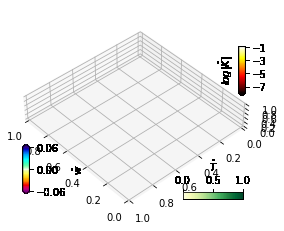

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', computed_zorder=False)

K_=ax.contourf(EKE.y_aca, EKE.x_caa, np.log(EKE.isel(time=-1)), zdir='z', offset=0.0, levels=np.linspace(-8,-1,101), cmap='hot', extend='min')
Tm=ax.contourf(T_w.isel(time=-1), T_w.y_aca, T_w.z_aac, zdir='x', offset=0, levels=np.linspace(0,1,101), cmap='YlGn', zorder=0)
ax.contour(T_w.isel(time=-1), T_w.y_aca, T_w.z_aac, zdir='x', offset=0, levels=[0.1,0.25,], linewidths=0.2, colors='k', zorder=1)
Wvel=ax.contourf(w_n.x_caa, w_n.isel(time=-1).T, w_n.z_aaf, zdir='y', offset=1, levels=np.linspace(-0.06,0.06,101),
                 cmap=cmaps.NCV_jaisnd_r, extend='both')
ax.set_box_aspect(aspect=(1, 1, 0.2))
ax.set(xlim=[0,1], ylim=[0,1], zlim=[-0.1,0], xticks=[], yticks=[], zticks=[])
ax.view_init(elev=42., azim=138, roll=0)

# Transparent spines
ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

cax_w = fig.add_axes([0.26, 0.23, 0.015, 0.17]) 
fig.colorbar(Wvel, cax=cax_w, label=r'$\hat{w}$', ticks=[-0.06,0,0.06])
cax_w.yaxis.set_label_position('right')
cax_w.yaxis.tick_right()
# cax_w.tick_params(axis='y', rotation=45)

cax_T = fig.add_axes([0.63, 0.21, 0.14, 0.024])
fig.colorbar(Tm, cax=cax_T, orientation='horizontal', label=r'$\hat{T}$', ticks=[0,0.5,1.0,])
cax_T.xaxis.set_label_position('top')
cax_T.xaxis.tick_top()

cax_K = fig.add_axes([0.76, 0.57, 0.015, 0.17])
fig.colorbar(K_, cax=cax_K, label=r'$log|\hat{K}|$', ticks=[-7,-5,-3,-1])
cax_K.yaxis.tick_right()
cax_K.yaxis.set_label_position('left')

# tx1=ax[0,0].text(90, -1.5, "time="+str(ds.time.astype('datetime64'
#                 ).dt.strftime('%H:%M:%S').isel(time=0).values), fontsize=16)


# Function to update the contour plot for each frame
def update(frame):
        frame = frame + 319
        ax.clear()
        K_=ax.contourf(EKE.y_aca, EKE.x_caa, np.log(EKE.isel(time=frame)), zdir='z', offset=0.0, levels=np.linspace(-8,-1,101), cmap='hot', extend='min')
        Tm=ax.contourf(T_w.isel(time=frame), T_w.y_aca, T_w.z_aac, zdir='x', offset=0, levels=np.linspace(0,1,101), cmap='YlGn', zorder=0)
        ax.contour(T_w.isel(time=frame), T_w.y_aca, T_w.z_aac, zdir='x', offset=0, levels=[0.1,0.25,], linewidths=0.2, colors='k', zorder=1)
        Wvel=ax.contourf(w_n.x_caa, w_n.isel(time=frame).T, w_n.z_aaf, zdir='y', offset=1, levels=np.linspace(-0.06,0.06,101),
                         cmap=cmaps.NCV_jaisnd_r, extend='both')
        ax.set_box_aspect(aspect=(1, 1, 0.2))
        ax.set(xlim=[0,1], ylim=[0,1], zlim=[-0.1,0], xticks=[], yticks=[], zticks=[])
        ax.view_init(elev=42., azim=138, roll=0)

        # Transparent spines
        ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
        ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
        ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

        cax_w = fig.add_axes([0.26, 0.23, 0.015, 0.17]) 
        fig.colorbar(Wvel, cax=cax_w, label=r'$\hat{w}$', ticks=[-0.06,0,0.06])
        cax_w.yaxis.set_label_position('right')
        cax_w.yaxis.tick_right()
        # cax_w.tick_params(axis='y', rotation=45)

        cax_T = fig.add_axes([0.63, 0.21, 0.14, 0.024])
        fig.colorbar(Tm, cax=cax_T, orientation='horizontal', label=r'$\hat{T}$', ticks=[0,0.5,1.0,])
        cax_T.xaxis.set_label_position('top')
        cax_T.xaxis.tick_top()

        cax_K = fig.add_axes([0.76, 0.57, 0.015, 0.17])
        fig.colorbar(K_, cax=cax_K, label=r'$log|\hat{K}|$', ticks=[-7,-5,-3,-1])
        cax_K.yaxis.tick_right()
        cax_K.yaxis.set_label_position('left')
        
        # tx1.set_text("time="+str(ds.time.astype('datetime64').dt.strftime(
        #                                         '%H:%M:%S').isel(time=frame).values))

        plt.savefig(direc + 'tmp/fig_'+str(frame).rjust(4,'0')+'.png', bbox_inches='tight', pad_inches=0.1, dpi=500)  #, bbox_inches='tight', pad_inches=0.1

        return []

# Create the animation object
ani = animation.FuncAnimation(fig, update, frames=500, interval=500, blit=True)

# Save the animation to a file
ani.save(direc + "tmp/3D_animation_v1.mp4", writer='ffmpeg',
         fps=6, dpi=100, savefig_kwargs={'bbox_inches': 'tight'})

# Show the animation
# plt.show()


In [ ]:
# ffmpeg -r 25 -f image2 -i fig_%04d.png -vf 'scale=trunc(iw/2)*2:trunc(ih/2)*2' -vcodec libx264 -crf 30 -pix_fmt yuv420p RHC_3d_anim_v2.mp4